In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    "languages_proc_stats.csv",
    parse_dates=["time"],
    index_col=0,
)

In [3]:
df2 = pd.DataFrame(df.mean(numeric_only=True)[0:5])

In [4]:
df['time'] = df['time'].dt.strftime('%m/%d/%Y')

<AxesSubplot:xlabel='time'>

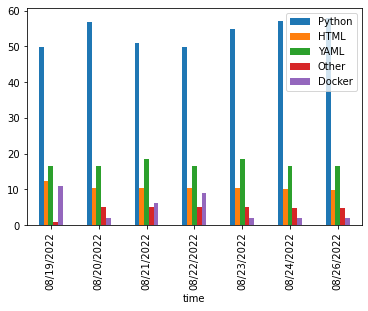

In [5]:
df.plot(x="time", y=df2.index, kind="bar")

<AxesSubplot:xlabel='time'>

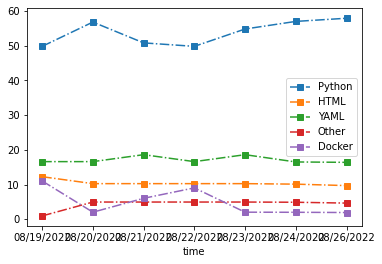

In [6]:
df.plot(x="time", y=df2.index, linestyle='-.', marker='s')

In [7]:
def statics(theme):
    """Статистика"""
    workouts = pd.read_json("data.json")
    stat = workouts["data"][theme]
    stats, times = [], []
    times.append(0)
    stats.append("Other")
        

    for i in stat:
        if i["total_seconds"] > 8000:
            if i["name"] != "Other":
                times.append(i["total_seconds"])
                stats.append(i["name"])
            else:
                times[0] += i["total_seconds"]
        else:
            times[0] += i["total_seconds"]
            
    if times[0] == 0:
        del(times[0])
        del(stats[0])

    fig, ax = plt.subplots()
    ax.pie(times, labels=stats, shadow=True)
    ax.axis("equal")

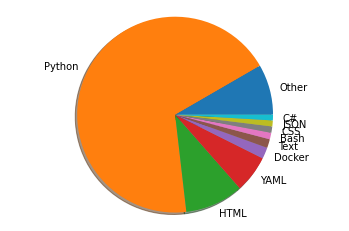

In [8]:
statics("languages")

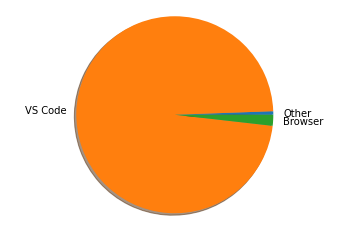

In [9]:
statics("editors")

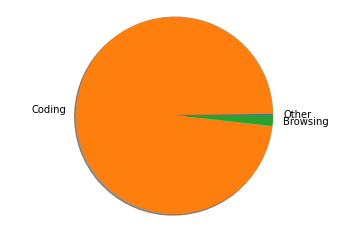

In [10]:
statics("categories")

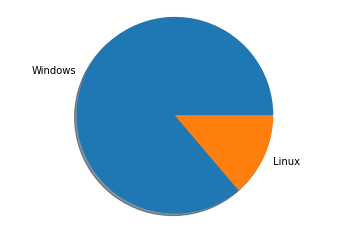

In [11]:
statics("operating_systems")